<a href="https://colab.research.google.com/github/SaurabhSRP/02-Recommendation-System-Projects/blob/main/Anime_Recommendation_system(Collaboration_based_recommendation_K_nearestNeighbors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
anime_df=pd.read_csv("/content/drive/MyDrive/datasets/Recommendation system  dataset/Anime Recom/anime.csv")
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
rating_df=pd.read_csv("/content/drive/MyDrive/datasets/Recommendation system  dataset/Anime Recom/rating.csv")
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


###Replace all -1 rating to zero , so we have list of rating from 0-10 and not -1 & 1-10

In [ ]:
rating_df['rating']=rating_df['rating'].replace(-1,0)

###In anime_df change feature name rating to Average_rating or avg_rating ,as it clashes with the rating faeture of rating_df. 

In [ ]:
anime_df.rename(columns={'rating':'avg_rating'},inplace=True)
anime_df.head(2)

,anime_id,name,genre,type,episodes,avg_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665


##Merge both the datasets 

In [ ]:
df=pd.merge(rating_df,anime_df,on='anime_id')
df.head(10)

,user_id,anime_id,rating,name,genre,type,episodes,avg_rating,members
0,1,20,0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
5,21,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
6,28,20,9,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
7,34,20,9,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
8,38,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
9,39,20,10,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [ ]:
print(df.isnull().sum())

user_id         0
anime_id        0
rating          0
name            0
genre         110
type            4
episodes        0
avg_rating      6
members         0
dtype: int64


#**EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


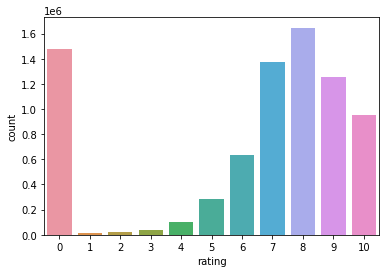

In [ ]:

sns.countplot(rating_df['rating'])

In [ ]:
df.groupby('name')['rating'].mean().sort_values(ascending=False).head(10)

name
Shiroi Zou                                                          10.000000
Choegang Top Plate                                                  10.000000
STAR BEAT!: Hoshi no Kodou                                          10.000000
Warui no wo Taose!! Salaryman Man                                   10.000000
Tang Lang Bu Chan                                                    9.000000
Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, Voice &amp; Fiction     9.000000
Shiranpuri                                                           9.000000
Doukyuusei                                                           9.000000
Steins;Gate 0                                                        8.500000
Kimi no Na wa.                                                       8.406094
Name: rating, dtype: float64

In [ ]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head(10)

name
Death Note                          39340
Sword Art Online                    30583
Shingeki no Kyojin                  29584
Code Geass: Hangyaku no Lelouch     27718
Elfen Lied                          27506
Angel Beats!                        27183
Naruto                              25925
Fullmetal Alchemist                 25032
Fullmetal Alchemist: Brotherhood    24574
Toradora!                           24283
Name: rating, dtype: int64

In [ ]:
Ratings=pd.DataFrame(df.groupby('name')['rating'].mean())
Ratings.head()

,rating
name,
&quot;0&quot;,3.115385
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.500000
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.962916
&quot;Bungaku Shoujo&quot; Memoire,6.337454
&quot;Bungaku Shoujo&quot; Movie,6.614332


In [ ]:
Ratings['Num_of_ratings']=pd.DataFrame(df.groupby('name')['rating'].count())
Ratings.head()

,rating,Num_of_ratings
name,,
&quot;0&quot;,3.115385,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.500000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.962916,782
&quot;Bungaku Shoujo&quot; Memoire,6.337454,809
&quot;Bungaku Shoujo&quot; Movie,6.614332,1535


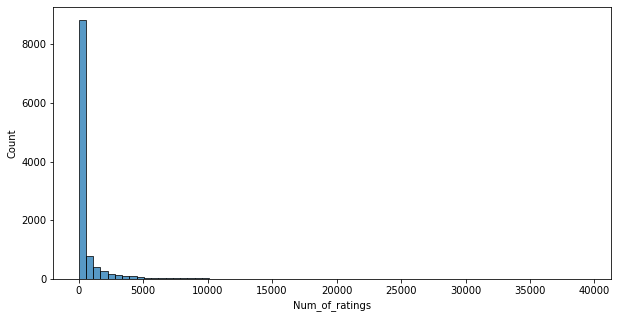

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(Ratings['Num_of_ratings'],bins=70)

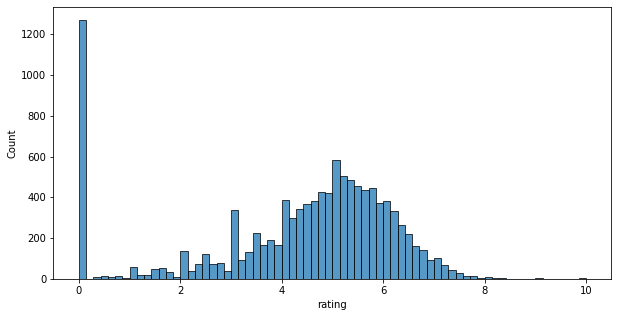

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(Ratings['rating'],bins=70)

<Figure size 720x720 with 0 Axes>

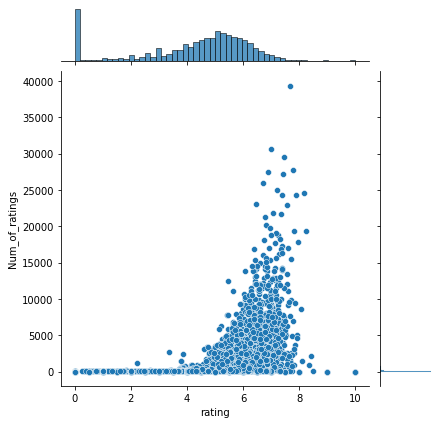

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x='rating',y='Num_of_ratings',data=Ratings)

#**Create a Matrix where Anime Title is on x axis and User ID is on y axis , so that we can get data of each user which anime it has rated**


First we will combine num_of_rating from Ratings to our main df

In [ ]:
df=df.merge(Ratings['Num_of_ratings'],left_on='name',right_on='name',how='left')
df.head(2)

,user_id,anime_id,rating,name,genre,type,episodes,avg_rating,members,Num_of_ratings
0,1,20,0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,25925
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,25925


###We create a threshold such that if a movie is rated by more than 500 users then only we will consider in our recommendation system. As the dataset is too big , and i am running it on google colab so i am adding this popularity threshold

In [ ]:
popularity_threshold=500
rating_popular_anime=df.query('Num_of_ratings >= @popularity_threshold')

In [ ]:
print(df.shape)
print(rating_popular_anime.shape)

(7813727, 10)
(7179746, 10)


In [ ]:
anime_pivot=rating_popular_anime.pivot_table(index='name',columns='user_id',values='rating').fillna(0)
anime_pivot.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Returner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Trilogy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
anime_pivot.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
anime_pivot.shape

(2514, 73422)

#**Convert pivot table into a matrix**

In [ ]:
from scipy.sparse import csr_matrix

anime_matrix = csr_matrix(anime_pivot.values)


In [ ]:
from sklearn.neighbors import NearestNeighbors
knn=NearestNeighbors(metric='cosine',algorithm='brute')


knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
anime_pivot.shape

(2514, 73422)

In [ ]:
query_index=np.random.choice(anime_pivot.shape[0]) 
query_index

#anime_pivot.shape has value of (2514,73422) then gives anime_pivot.shape[0] the row value of the shape whose value 2514
#As in the above program the number anime_pivot.shape is passed to the choice() function, 
#so the choice() function randomly select the single number from the range [0, 2514], 
#so in the above output if we see every time it generates the random number are in the range [0, 2514].
#you can give a static number of our own to get a recommendation instead of query_index

1404

In [ ]:
distances,indices=knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6) ###neightbors decide no of recommendation

#anime_pivot.iloc[query_index,:] locates the anime name of query_index id and gives the list of all the user rating of the given anime name
# anime_pivot.iloc[query_index,:].values gives the values in array form 
#anime_pivot.iloc[query_index,:].values.reshape(1,-1) , reshape the array in 1D form

In [ ]:
print(distances)
print(len(distances))

[[0.         0.40129882 0.4828114  0.59212623 0.6396027  0.64815263]]
1


In [ ]:
print(distances.flatten())
print(len(distances.flatten()))

[0.         0.40129882 0.4828114  0.59212623 0.6396027  0.64815263]
6


In [ ]:
indices

array([[1404, 1401, 1402, 1403,  653, 1967]])

In [ ]:
for i in range(0,len(distances.flatten())):
  if i==0:
    print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
  else:
    print('{0}:{1}, with distance of {2}'.format(i,anime_pivot.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendations for Maken-Ki! Two:

1:Maken-Ki!, with distance of 0.40129881530231815
2:Maken-Ki! OVA, with distance of 0.4828113956905007
3:Maken-Ki! Specials, with distance of 0.5921262332063684
4:Freezing Vibration, with distance of 0.6396027027333118
5:Seikoku no Dragonar, with distance of 0.6481526309332093


#**Lets try out by giving our own Anime_id**

In [ ]:
anime_id=input('Type random number from 0-2514\n')
anime_id=int(anime_id)
distances,indices=knn.kneighbors(anime_pivot.iloc[anime_id,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0,len(distances.flatten())):
  if i==0:
    print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
  else:
    print('{0}:{1}, with distance of {2}'.format(i,anime_pivot.index[indices.flatten()[i]],distances.flatten()[i]))


Type random number from 0-2514
25
Recommendations for Maken-Ki! Two:

1:AKB0048: Next Stage, with distance of 0.17066296927299818
2:Vividred Operation, with distance of 0.749339136190222
3:Senki Zesshou Symphogear: Meteoroid-Falling, Burning, and Disappear, Then..., with distance of 0.7519131126601013
4:Love Live! School Idol Project, with distance of 0.7532922240905062
5:Natsu-iro Kiseki, with distance of 0.7561499849325786
